# Results

In [1]:
import pandas as pd
import os

metrics = [
        "accuracy",
        "balanced_accuracy",
        "f1",
        "precision",
        "recall",
        "specificity",
        "ROC_AUC",
        "MCC",
    ]

In [62]:
all_models_results = {}
main_result_folder = os.path.join("results", "day_windows")
datasets = ["hyperactiv", "depresjon"]
models = ["LR", "RF", "SVM", "GBM"]
types = ["full_24h", "8_21_day", "6_22_day", "8_21_night", "6_22_night"]

for dataset in datasets:
    paths_to_results_folder = os.path.join(main_result_folder, dataset, "predictions")
    all_models_results[dataset] = {}
    for t in types:
        results_df = pd.read_csv(os.path.join(paths_to_results_folder, f"voting_scores_{t}.csv"))
        results_df.set_index('classifier', inplace=True)
        all_models_results[dataset][t] = {model: results_df.loc[model] for model in models}


In [76]:
all_models_results

{'hyperactiv': {'full_24h': {'LR': accuracy             0.411765
   balanced_accuracy    0.415278
   f1                   0.390244
   precision            0.432432
   recall               0.355556
   specificity          0.475000
   ROC_AUC              0.415278
   MCC                 -0.170585
   Name: LR, dtype: float64,
   'RF': accuracy             0.482353
   balanced_accuracy    0.480556
   f1                   0.511111
   precision            0.511111
   recall               0.511111
   specificity          0.450000
   ROC_AUC              0.480556
   MCC                 -0.038889
   Name: RF, dtype: float64,
   'SVM': accuracy             0.541176
   balanced_accuracy    0.534722
   f1                   0.597938
   precision            0.557692
   recall               0.644444
   specificity          0.425000
   ROC_AUC              0.534722
   MCC                  0.071124
   Name: SVM, dtype: float64,
   'GBM': accuracy             0.458824
   balanced_accuracy    0.455556
  

In [31]:
def get_dataset_part_results(dataset_results_path):
    results = []
    results_df = pd.read_csv(dataset_results_path)
    results_df.set_index('classifier', inplace=True)

    for classifier in results_df.index.unique():
        model_results = results_df.loc[classifier]
        model_results.name = classifier
        results.append(model_results)
    return results


In [9]:
import numpy as np
import matplotlib.pyplot as plt


def plot_final_results(
        models_final_results: list[pd.Series], 
        title: str, 
        one_plot: bool = False, 
        figsize: tuple[float, float] = (10, 6)
) -> None:
    df = pd.concat(models_final_results, axis=1)
    
    if one_plot:
        df.plot(kind='bar', figsize=figsize)
        plt.title(title)
        plt.xlabel('Metrics')
        plt.xticks(rotation=45)
        plt.ylabel('Values')
        plt.legend(title="Models")
        plt.tight_layout()
        plt.show()
    else:
        num_models = len(df.columns)
        colors = plt.colormaps['tab10'](np.linspace(0, 1, num_models))
        
        num_metrics = len(df.index)
        fig, axes = plt.subplots(nrows=(num_metrics + 1 )// 2, ncols=2, figsize=figsize, sharey=True)

        axes = axes.flatten()
        
        for ax, metric in zip(axes, df.index):
            ax.bar(df.columns, df.loc[metric], color=colors)
            ax.set_title(f'{title}: {metric}')
            ax.set_xlabel('Models')
            ax.set_ylabel('Value')
        
        for ax in axes[len(df.index):]:
            ax.axis('off')
        
        plt.tight_layout()
        plt.show()

In [55]:
def plot_model_comparison(results: dict[str, dict[str, pd.Series]], title: str, figsize: tuple[float, float] = (10, 6)):
    types = list(results.keys())
    first_type = types[0]
    first_model = next(iter(results[first_type].keys()))

    num_metrics = len(results[first_type][first_model].index)
    metrics = results[first_type][first_model].index

    colors = plt.colormaps['tab10'](np.linspace(0, 1, len(results[first_type])))

    fig, axes = plt.subplots(nrows=(num_metrics + 1) // 2, ncols=2, figsize=figsize, sharey=True)
    axes = axes.flatten()

    for i, ax in enumerate(axes[:num_metrics]):
        data = {model: [results[t][model].iloc[i] for t in types] for model in results[first_type]}
        df = pd.DataFrame(data, index=types)
        df.plot(kind='bar', ax=ax, color=colors)
        ax.set_title(f'{title}: {metrics[i]}')
        ax.set_xlabel('Time Windows')
        ax.set_ylabel('Value')

    plt.tight_layout()
    plt.show()


In [90]:
def plot_day_night_full_comparison(results: dict[str, dict[str, pd.Series]], title: str, figsize: tuple[float, float] = (10, 6)):
    types = list(results.keys())

    first_type = types[0]
    first_model = next(iter(results[first_type].keys()))

    num_metrics = len(results[first_type][first_model].index)
    metrics = results[first_type][first_model].index

    models = list(results[first_type].keys())
    num_models = len(models)

    colors = plt.colormaps['tab10'](np.linspace(0, 1, len(types)))
 
    fig, axes = plt.subplots(nrows=(num_metrics + 1) // 2, ncols=2, figsize=figsize, sharey=True)
    axes = axes.flatten()

    for i, ax in enumerate(axes[:num_metrics]):
        data = {}

        for t in types:
            time_window_data = []
            for model_name in models:
                result = results[t][model_name]
                time_window_data.append(result.iloc[i])
            data[t] = time_window_data

        df = pd.DataFrame(data, index=models)

        df.plot(kind='bar', ax=ax, color=colors)
        ax.set_title(f'{title}: {metrics[i]}')
        ax.set_xlabel('Models')
        ax.set_ylabel('Value')

    plt.tight_layout()
    plt.show()

## Plots

### Hyperactiv

In [35]:
path_to_hyperactive_results_folder = os.path.join("results", "day_windows", "hyperactiv", "predictions")
day_8_21_models_scores = os.path.join(path_to_hyperactive_results_folder, "voting_scores_8_21_day.csv") 
day_6_22_models_scores = os.path.join(path_to_hyperactive_results_folder, "voting_scores_6_22_day.csv")
night_8_21_models_scores = os.path.join(path_to_hyperactive_results_folder, "voting_scores_8_21_night.csv")
night_6_22_models_scores = os.path.join(path_to_hyperactive_results_folder, "voting_scores_6_22_night.csv")
full_24h_models_scores = os.path.join(path_to_hyperactive_results_folder, "voting_scores_full_24h.csv")

In [37]:
results_hyperactive_day_8_21 = get_dataset_part_results(day_8_21_models_scores)
results_hyperactive_day_6_22 = get_dataset_part_results(day_6_22_models_scores)
results_hyperactive_night_8_21 = get_dataset_part_results(night_8_21_models_scores)
results_hyperactive_night_6_22 = get_dataset_part_results(night_6_22_models_scores)
results_hyperactive_full_24h = get_dataset_part_results(full_24h_models_scores)


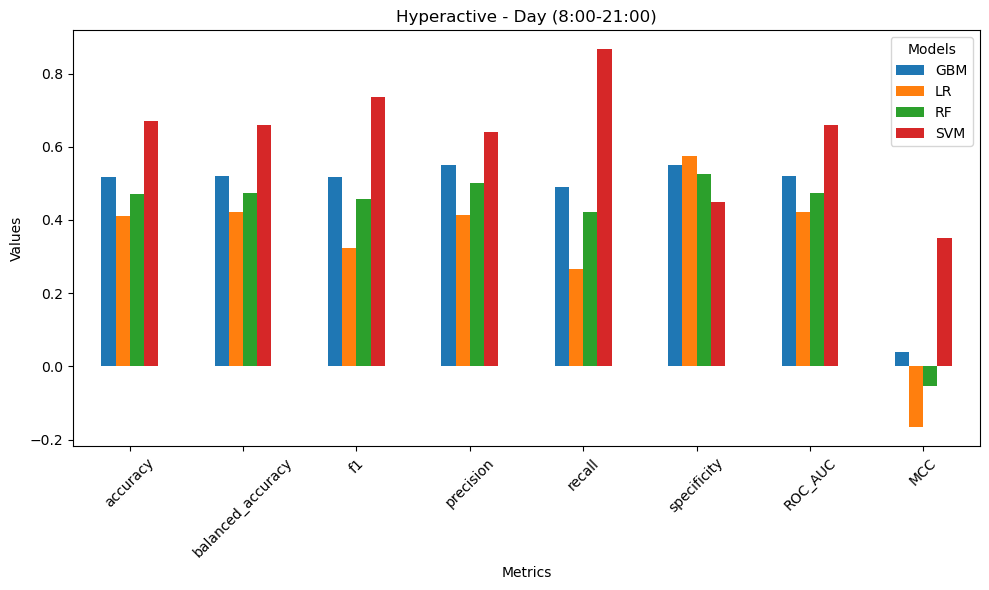

In [34]:
plot_final_results(results_hyperactive_day_8_21, "Hyperactive - Day (8:00-21:00)", one_plot=True)

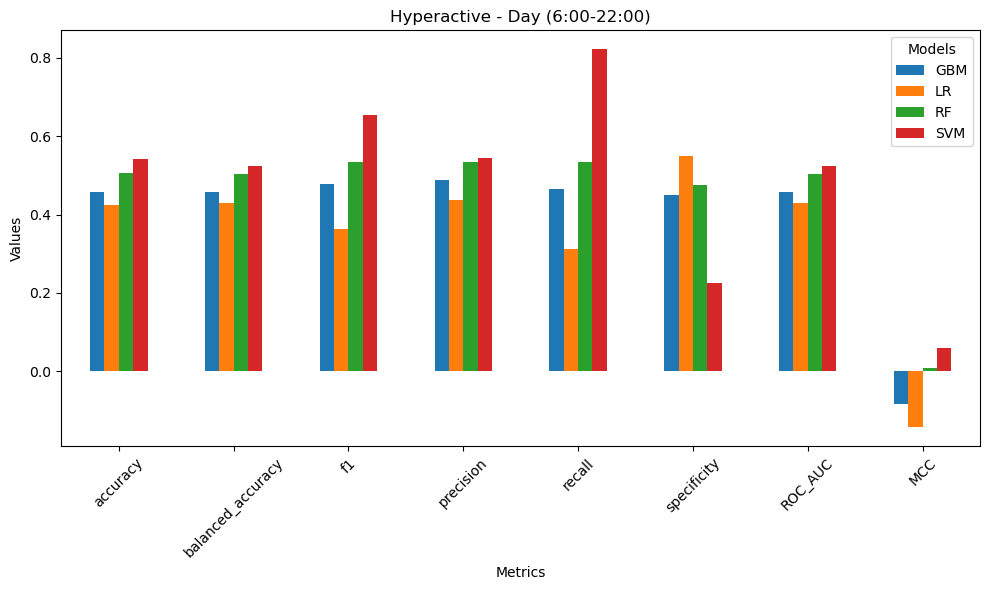

In [38]:
plot_final_results(results_hyperactive_day_6_22, "Hyperactive - Day (6:00-22:00)", one_plot=True)

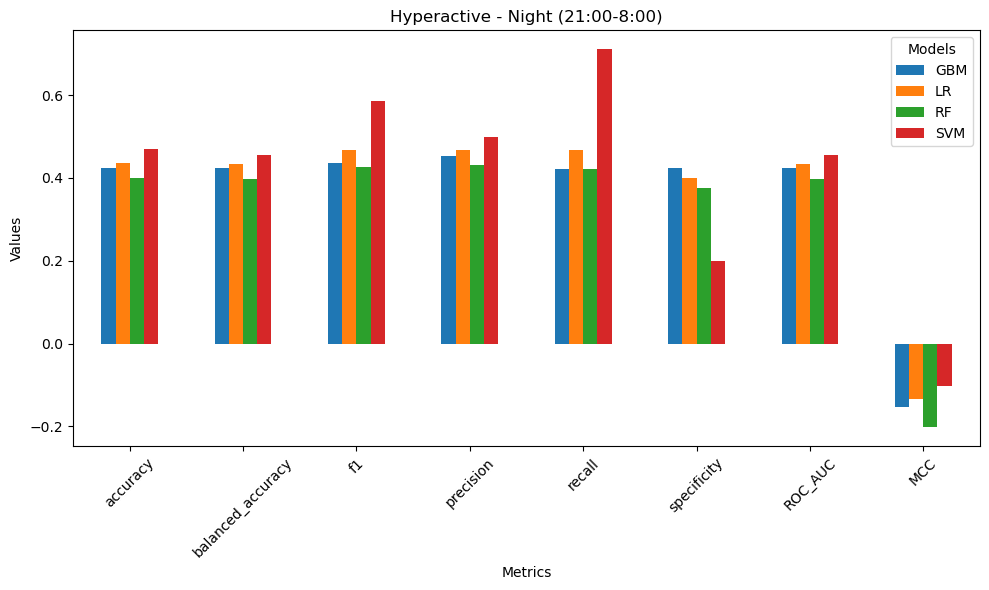

In [39]:
plot_final_results(results_hyperactive_night_8_21, "Hyperactive - Night (21:00-8:00)", one_plot=True)

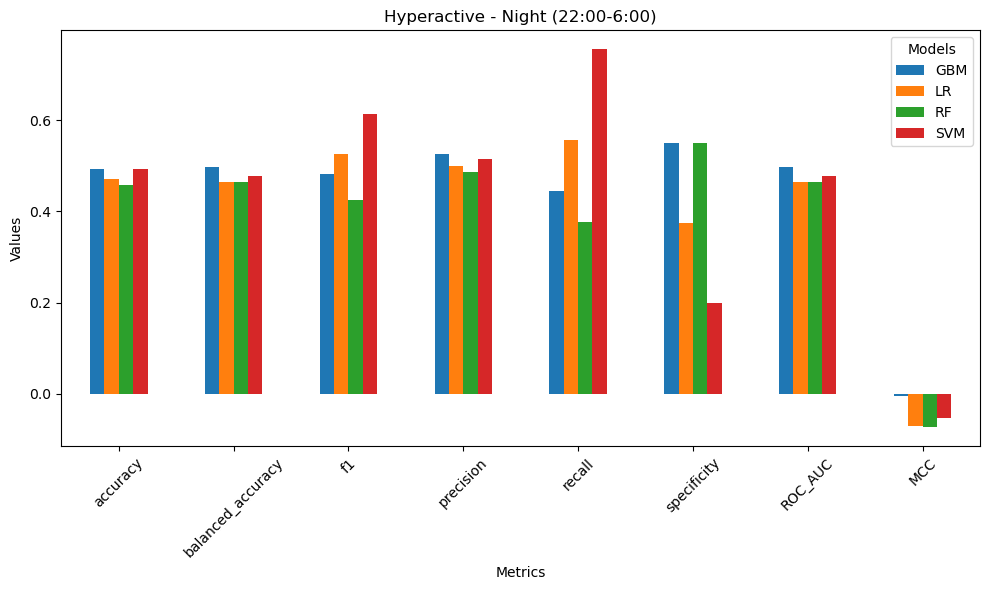

In [40]:
plot_final_results(results_hyperactive_night_6_22, "Hyperactive - Night (22:00-6:00)", one_plot=True)

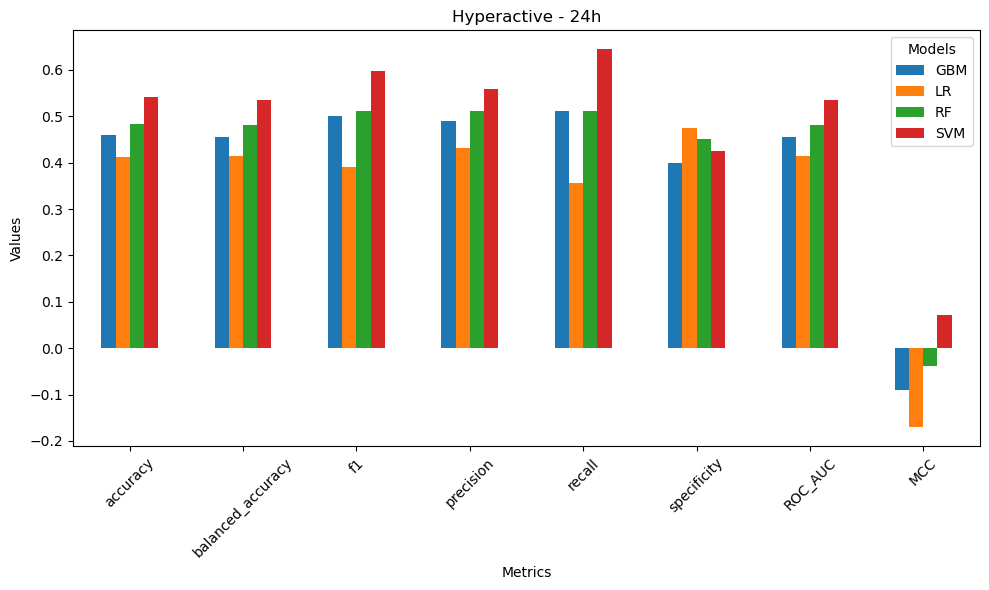

In [41]:
plot_final_results(results_hyperactive_full_24h, "Hyperactive - 24h", one_plot=True)

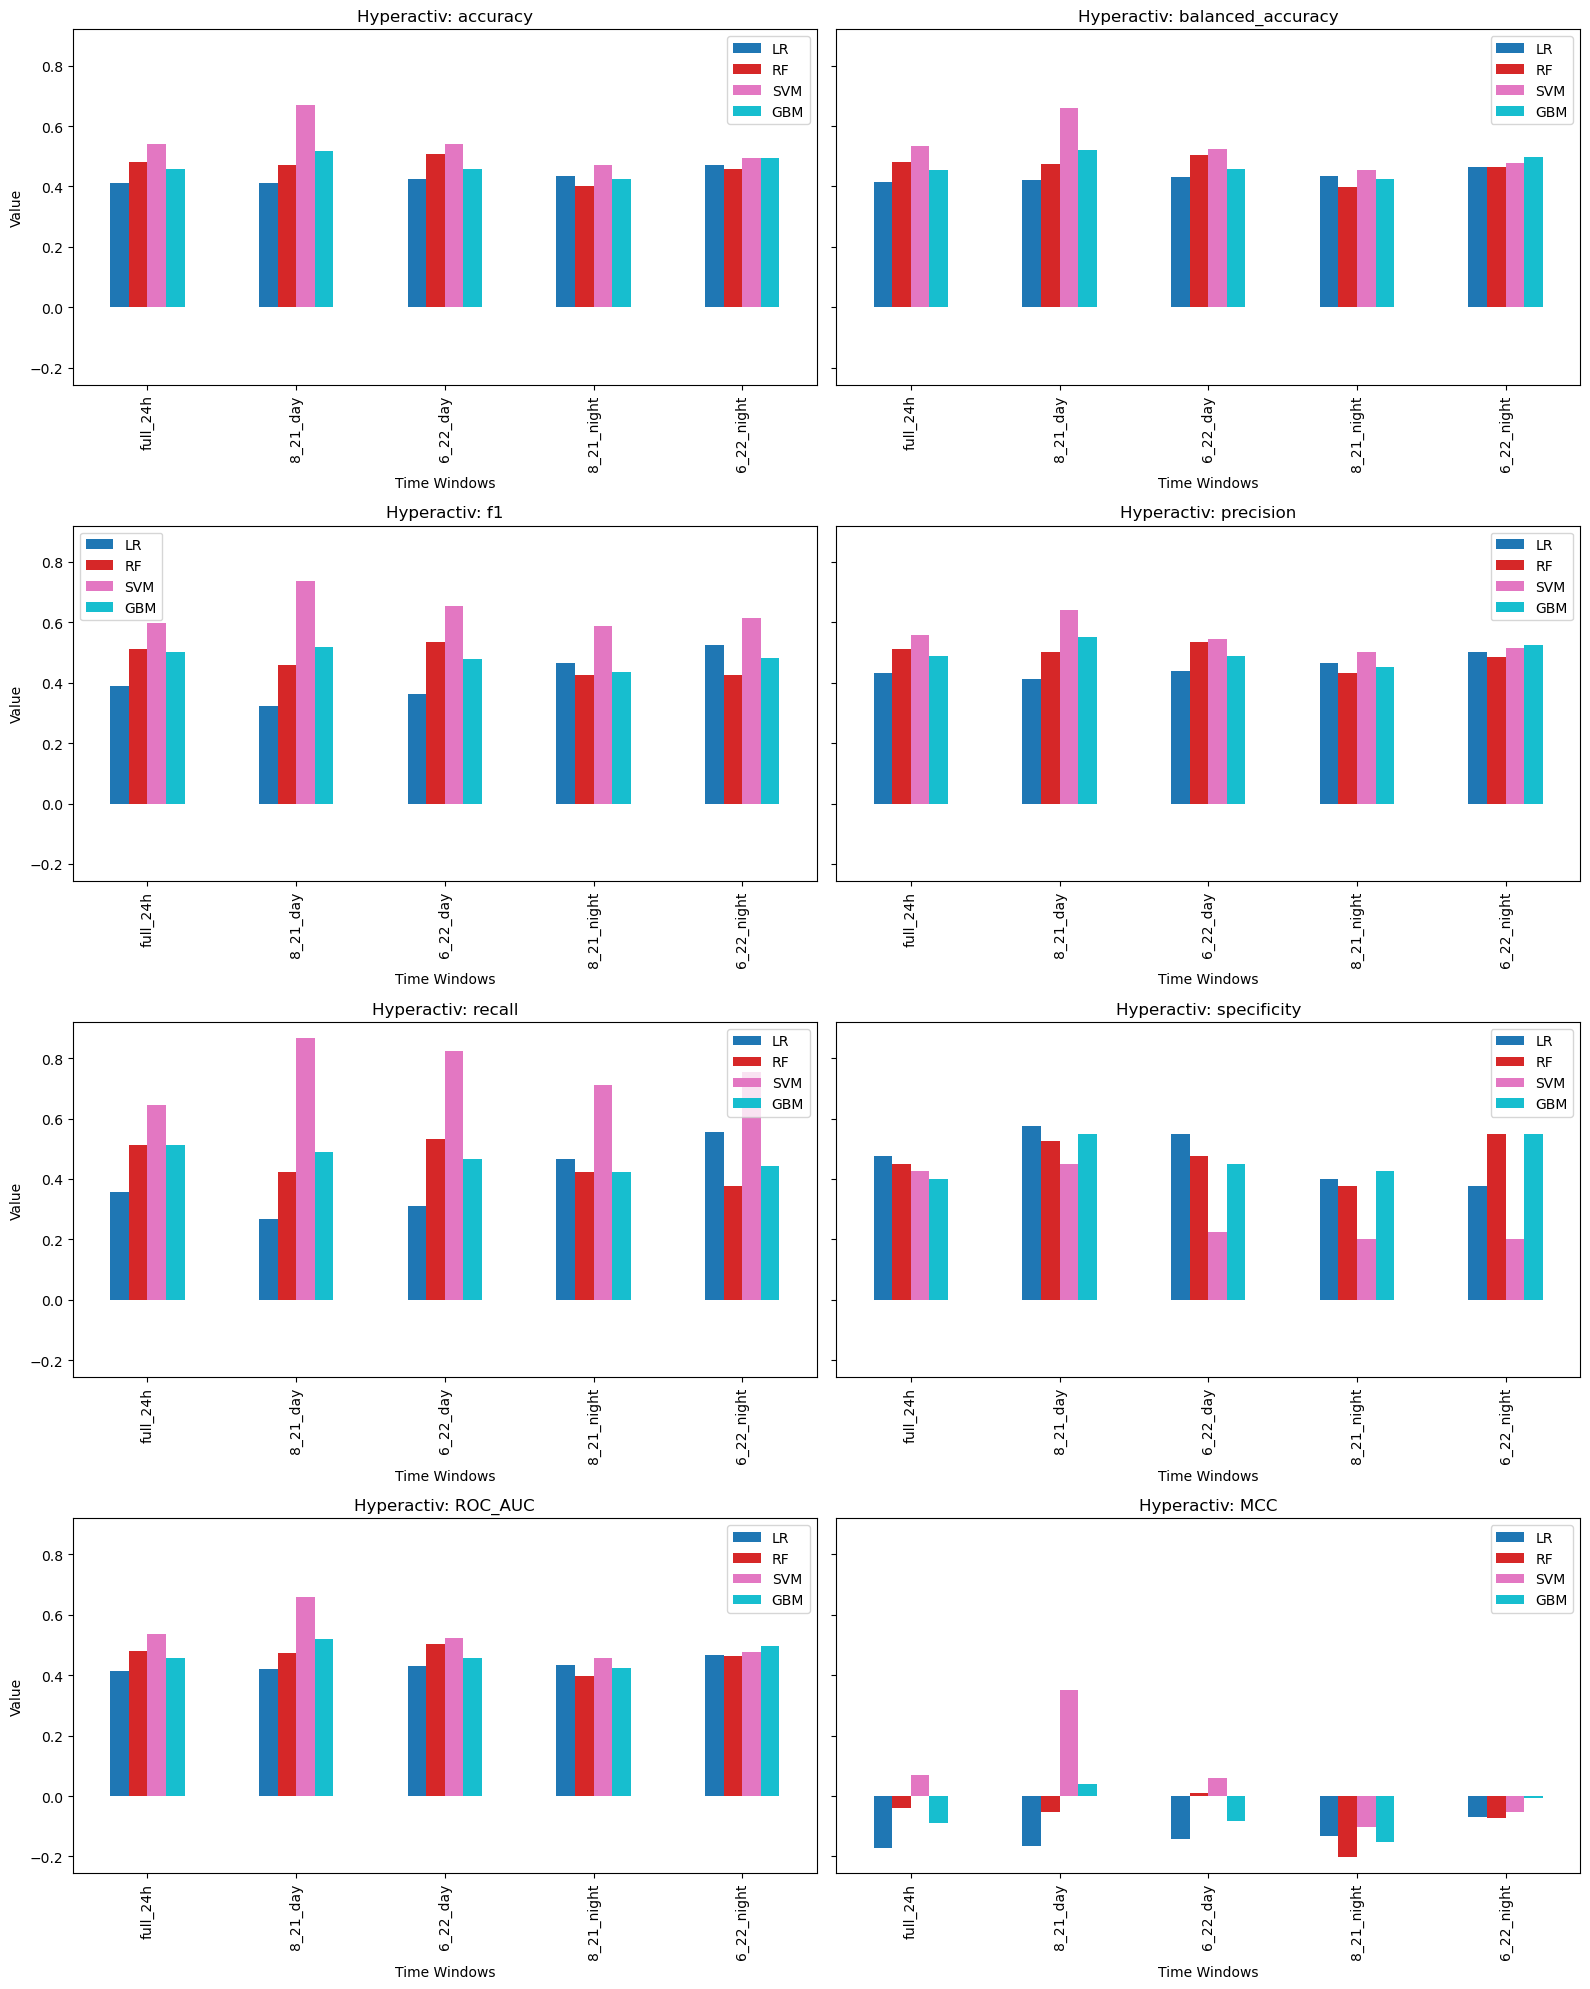

In [56]:
plot_model_comparison(all_models_results["hyperactiv"], "Hyperactiv", figsize=(16, 20))

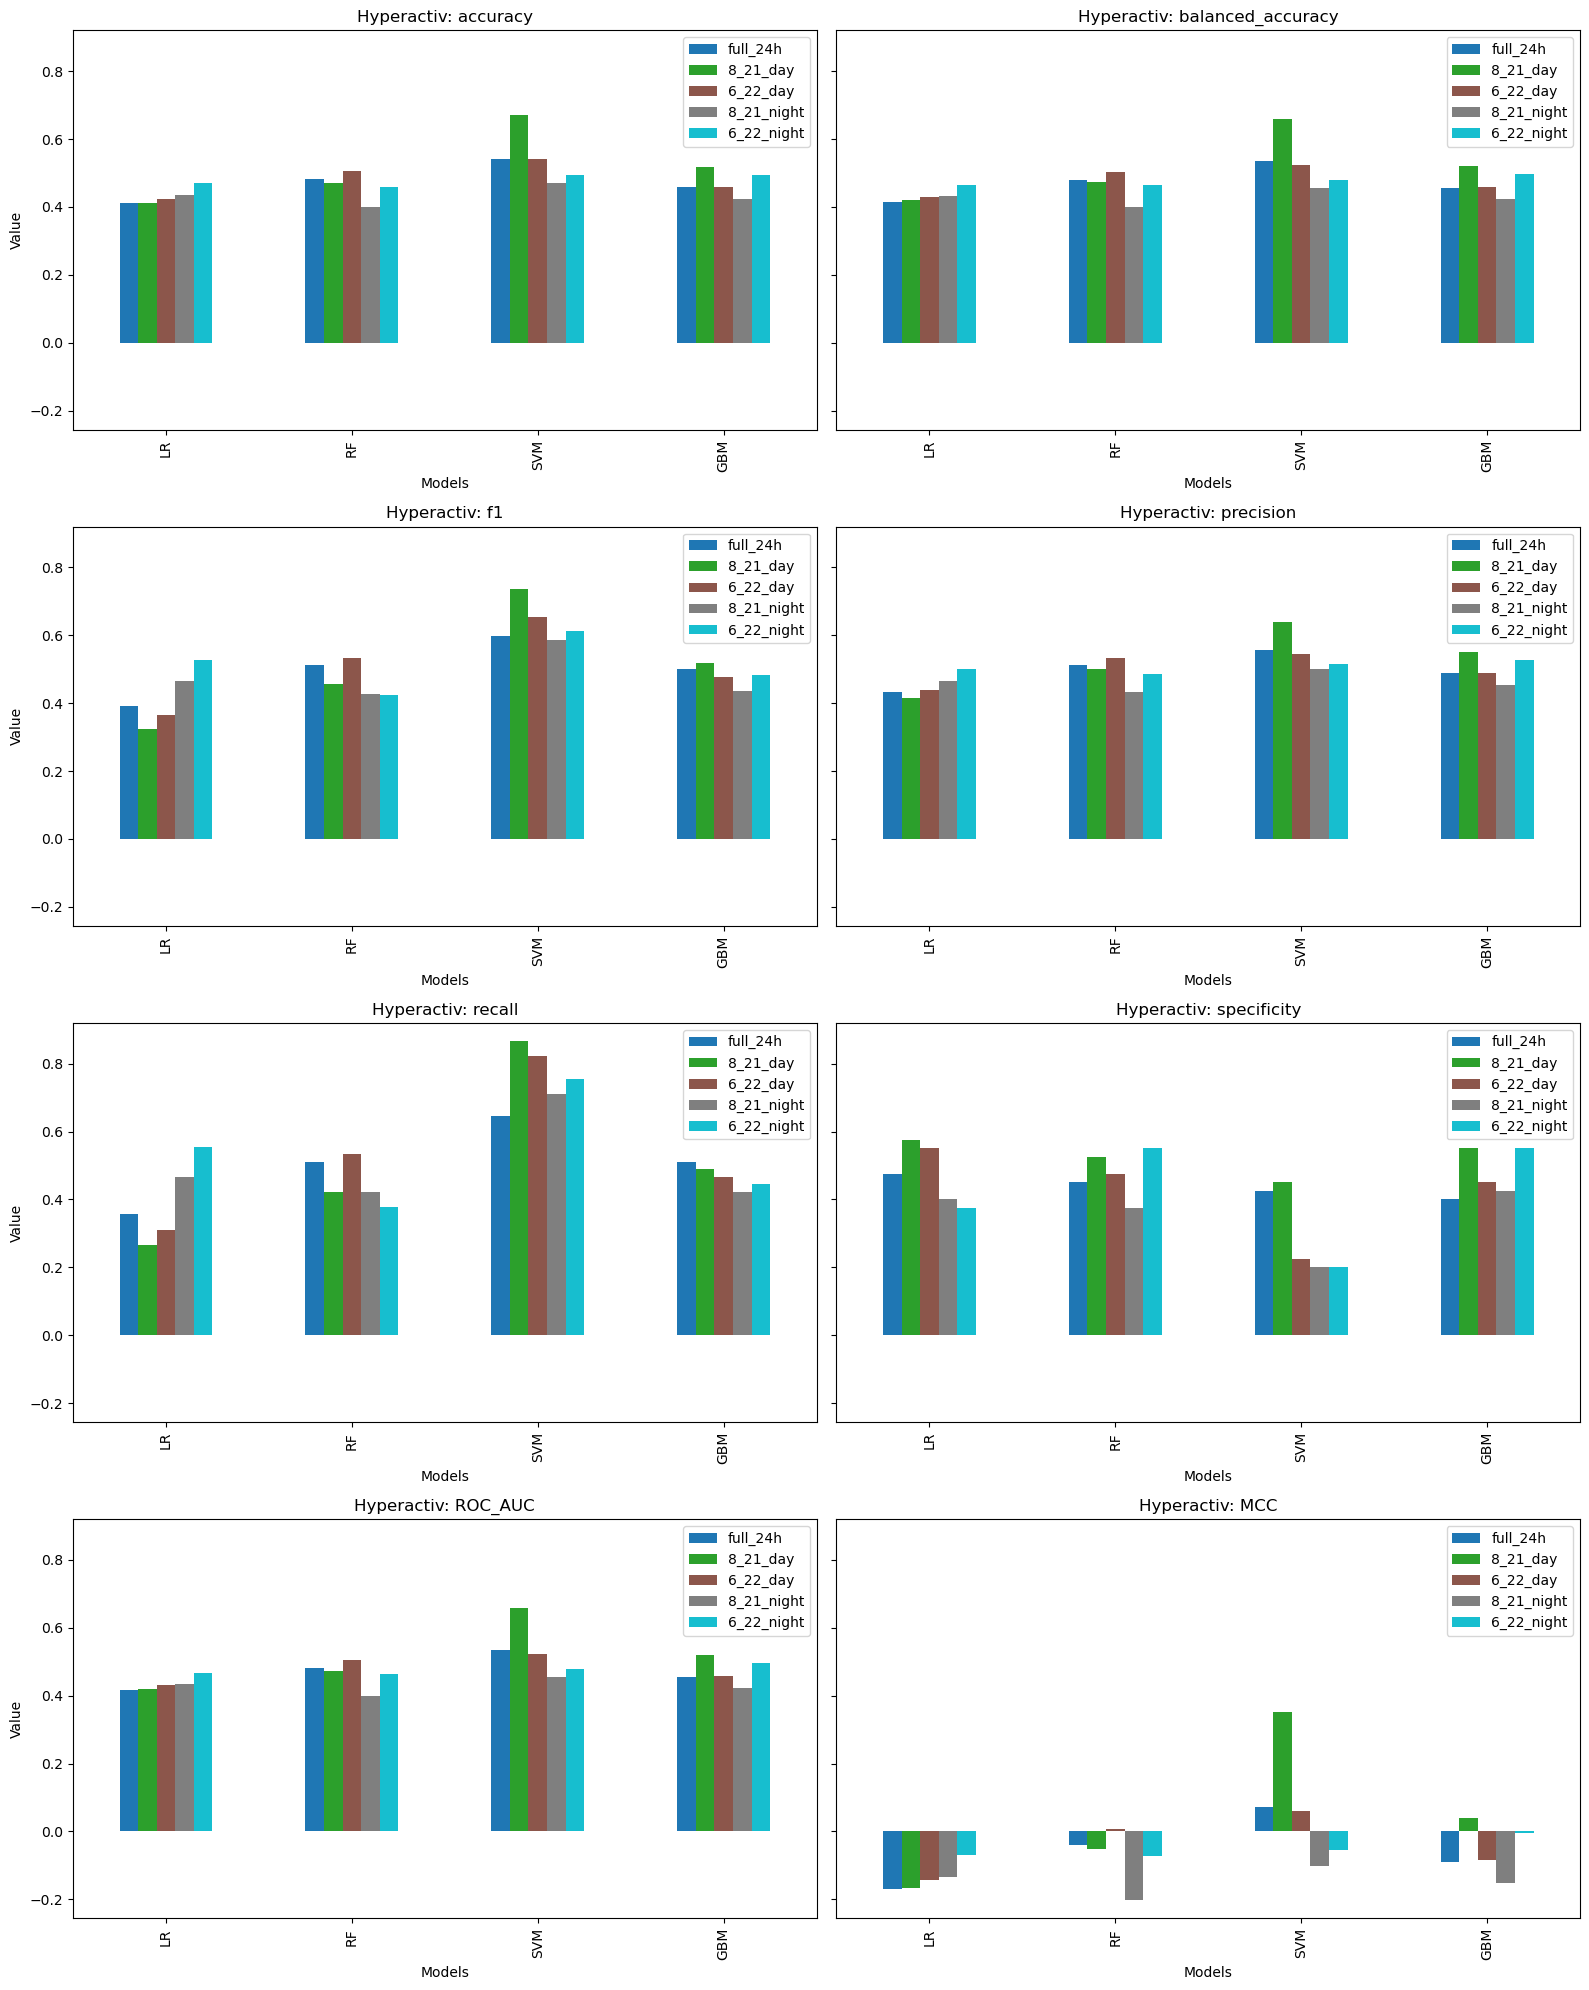

In [91]:
plot_day_night_full_comparison(all_models_results["hyperactiv"], "Hyperactiv", figsize=(16, 20))

### Depresjon

In [63]:
path_to_depresjon_results_folder = os.path.join("results", "day_windows", "depresjon", "predictions")
day_8_21_models_scores = os.path.join(path_to_depresjon_results_folder, "voting_scores_8_21_day.csv") 
day_6_22_models_scores = os.path.join(path_to_depresjon_results_folder, "voting_scores_6_22_day.csv")
night_8_21_models_scores = os.path.join(path_to_depresjon_results_folder, "voting_scores_8_21_night.csv")
night_6_22_models_scores = os.path.join(path_to_depresjon_results_folder, "voting_scores_6_22_night.csv")
full_24h_models_scores = os.path.join(path_to_depresjon_results_folder, "voting_scores_full_24h.csv")

In [64]:
results_depresjon_day_8_21 = get_dataset_part_results(day_8_21_models_scores)
results_depresjon_day_6_22 = get_dataset_part_results(day_6_22_models_scores)
results_depresjon_night_8_21 = get_dataset_part_results(night_8_21_models_scores)
results_depresjon_night_6_22 = get_dataset_part_results(night_6_22_models_scores)
results_depresjon_full_24h = get_dataset_part_results(full_24h_models_scores)

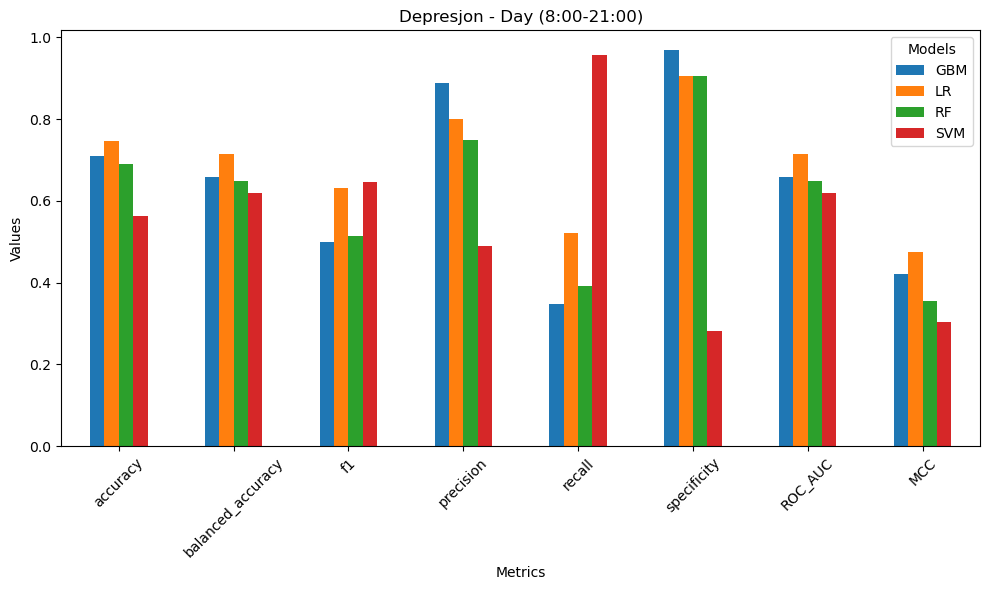

In [65]:
plot_final_results(results_depresjon_day_8_21, "Depresjon - Day (8:00-21:00)", one_plot=True)

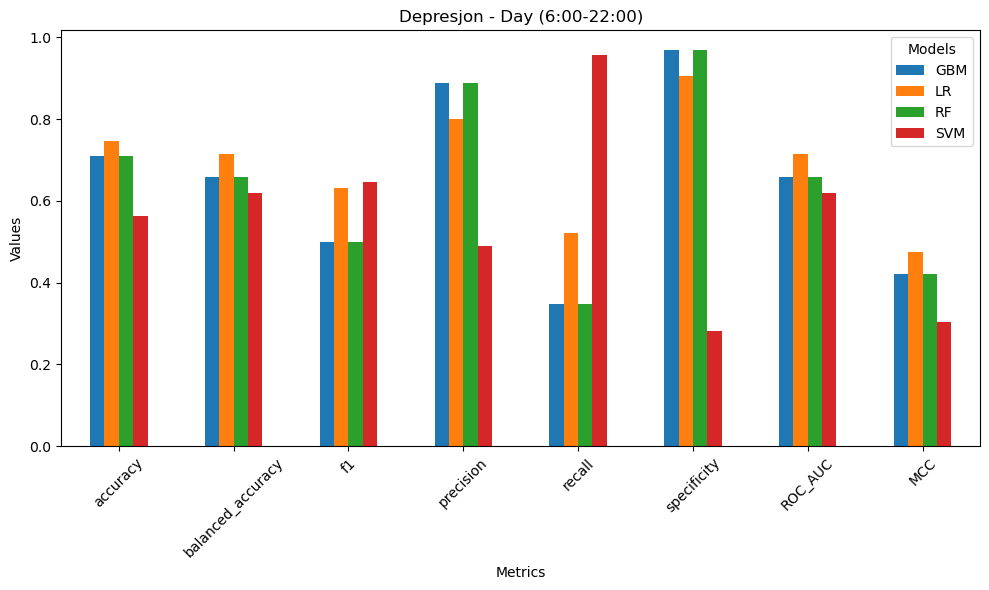

In [66]:
plot_final_results(results_depresjon_day_6_22, "Depresjon - Day (6:00-22:00)", one_plot=True)

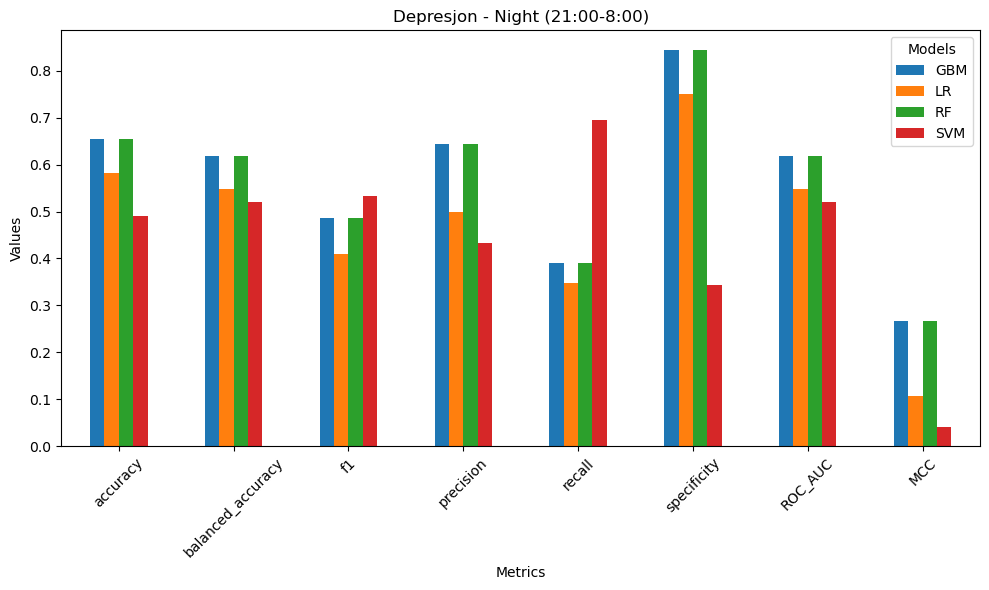

In [67]:
plot_final_results(results_depresjon_night_8_21, "Depresjon - Night (21:00-8:00)", one_plot=True)

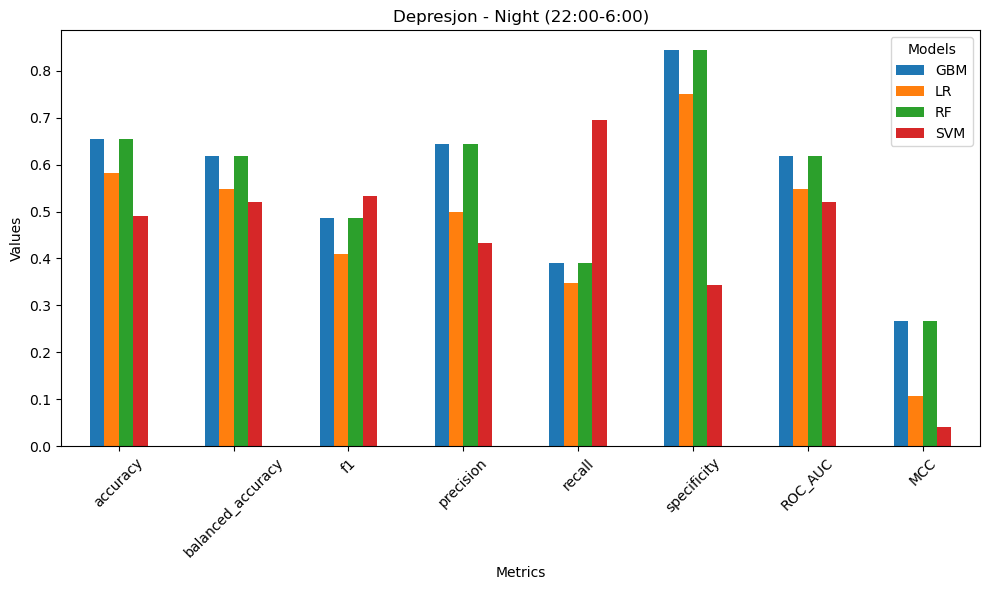

In [68]:
plot_final_results(results_depresjon_night_6_22, "Depresjon - Night (22:00-6:00)", one_plot=True)

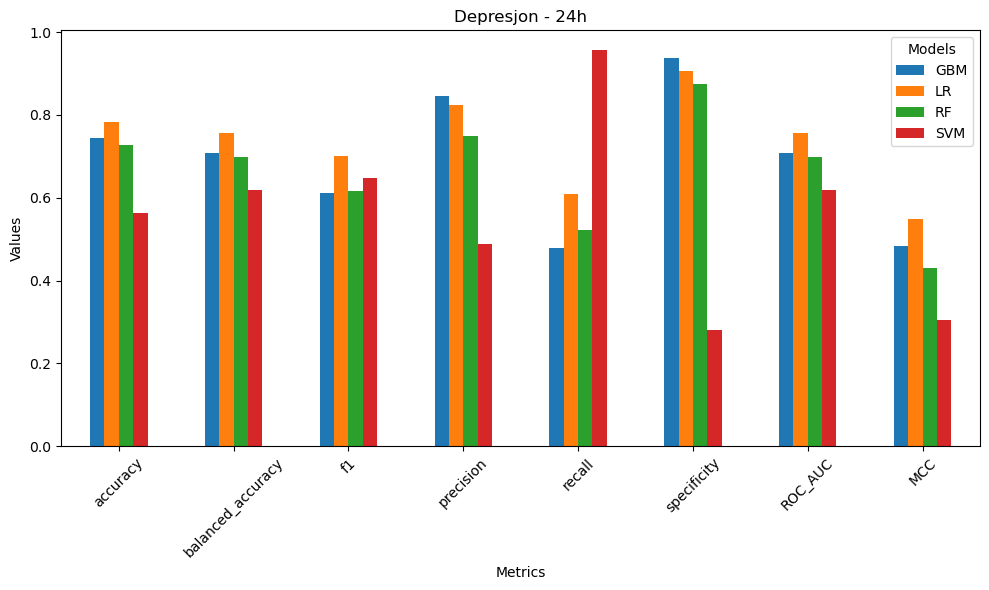

In [69]:
plot_final_results(results_depresjon_full_24h, "Depresjon - 24h", one_plot=True)

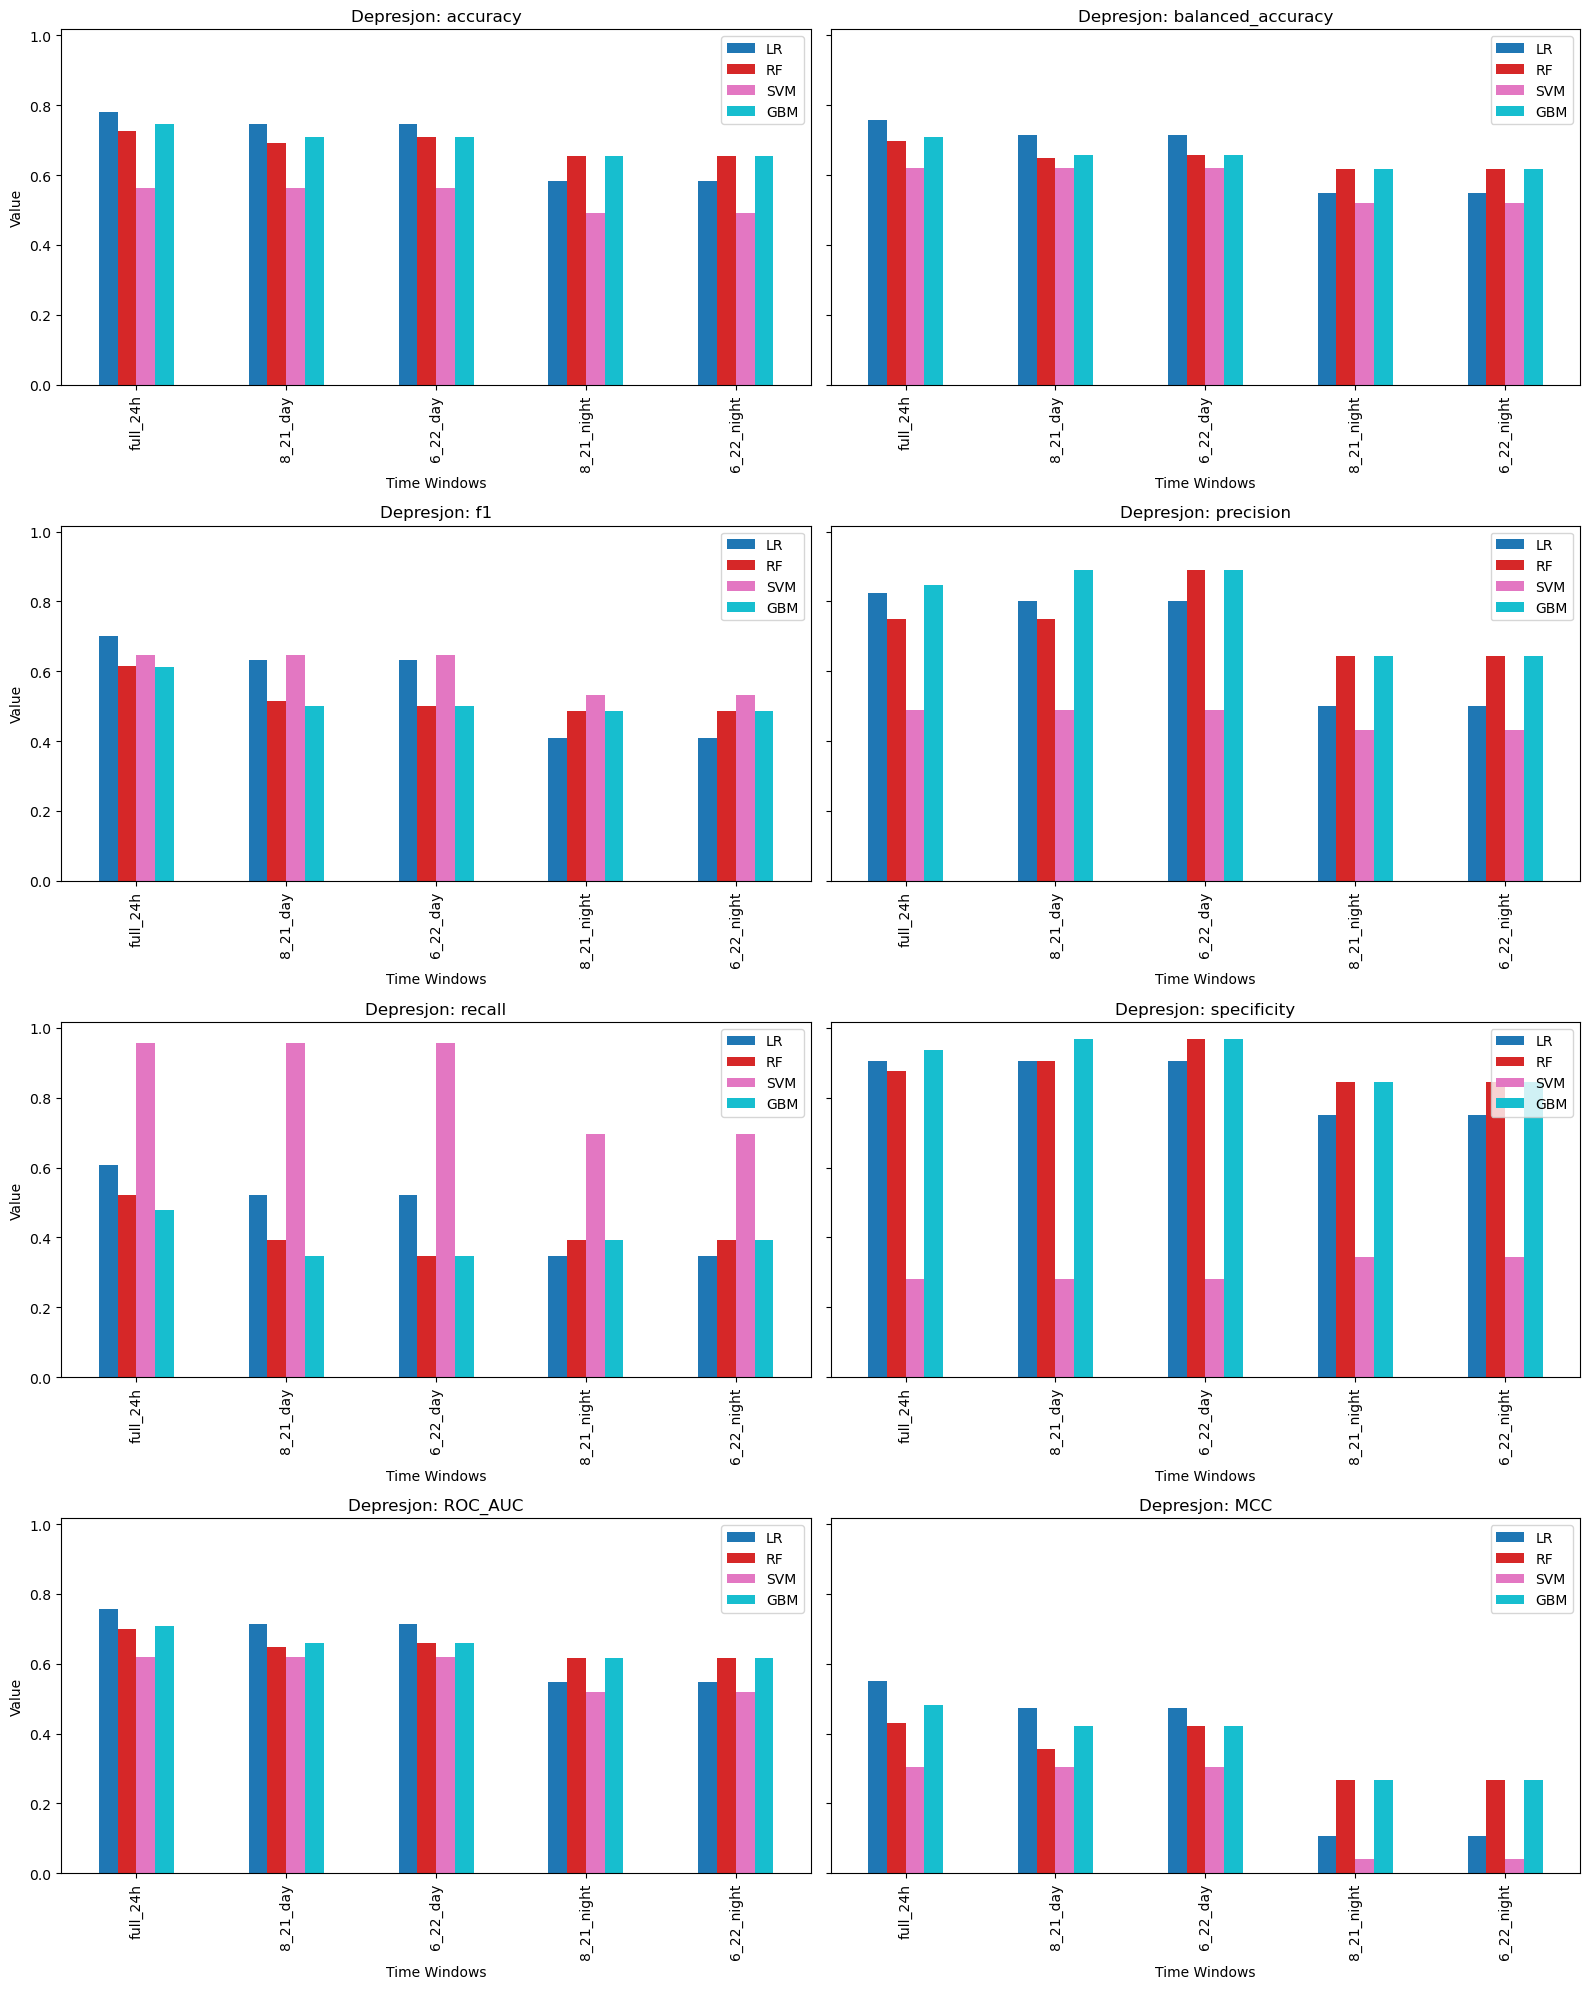

In [70]:
plot_model_comparison(all_models_results["depresjon"], "Depresjon", figsize=(16, 20))

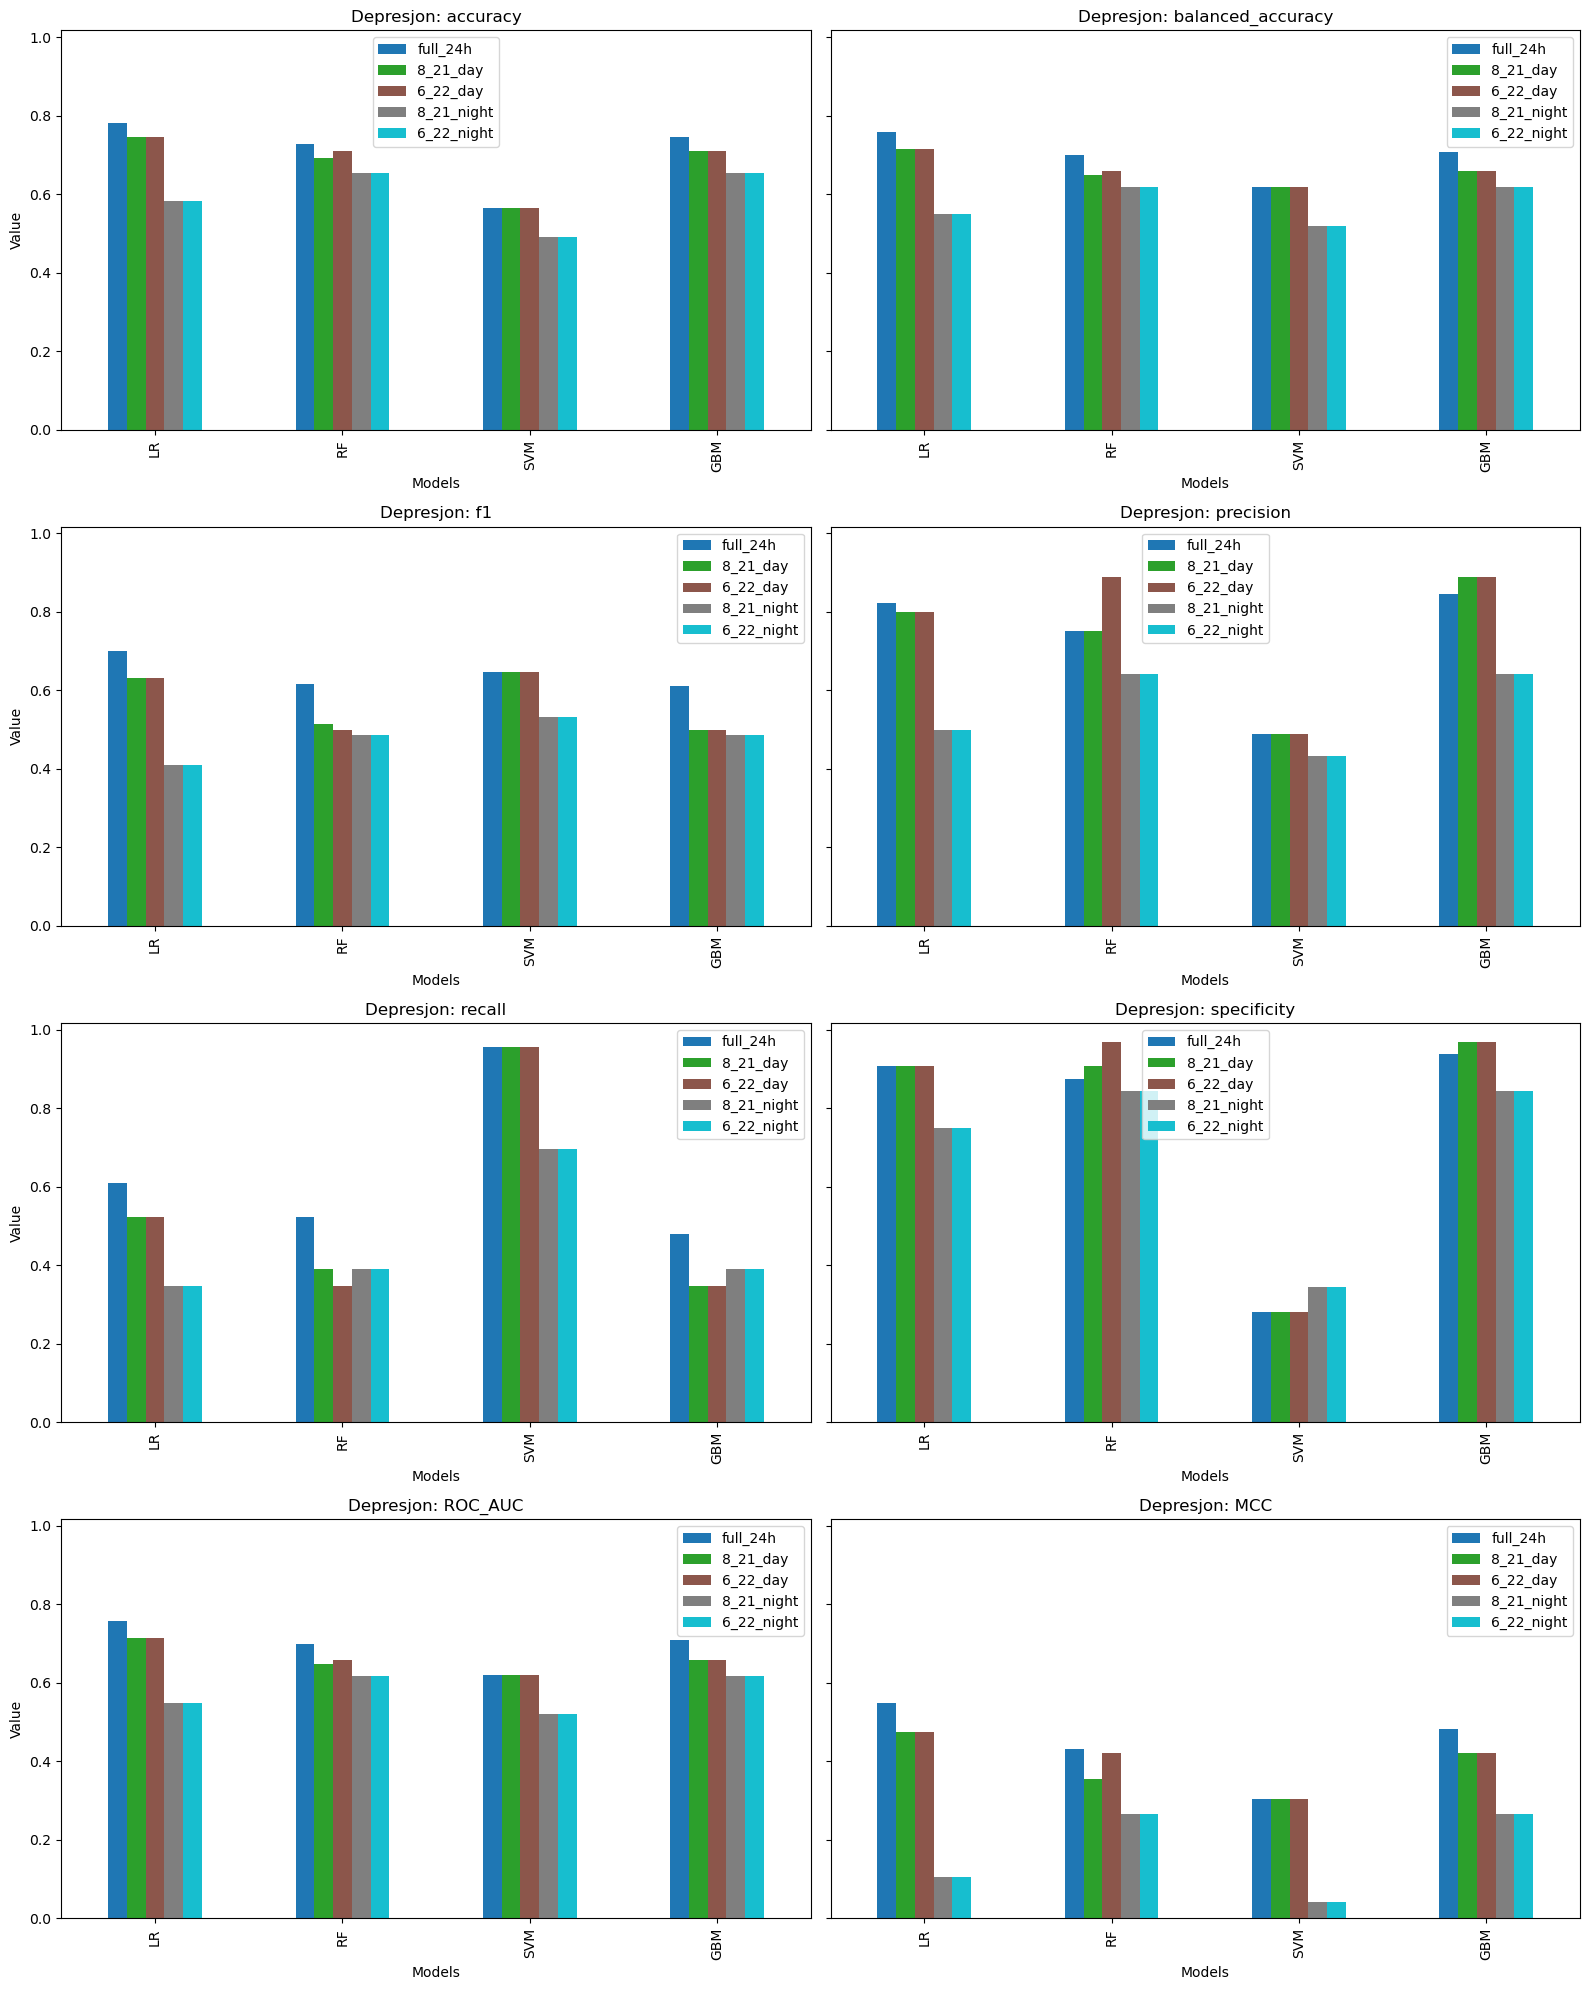

In [92]:
plot_day_night_full_comparison(all_models_results["depresjon"], "Depresjon", figsize=(16, 20))

### Psykose

In [70]:
path_to_psykose_results_folder = os.path.join("results", "day_windows", "psykose", "predictions")
day_8_21_models_scores = os.path.join(path_to_psykose_results_folder, "voting_scores_8_21_day.csv") 
day_6_22_models_scores = os.path.join(path_to_psykose_results_folder, "voting_scores_6_22_day.csv")
night_8_21_models_scores = os.path.join(path_to_psykose_results_folder, "voting_scores_8_21_night.csv")
night_6_22_models_scores = os.path.join(path_to_psykose_results_folder, "voting_scores_6_22_night.csv")
full_24h_models_scores = os.path.join(path_to_psykose_results_folder, "voting_scores_full_24h.csv")

In [71]:
results_psykose_day_8_21 = get_dataset_part_results(path_to_psykose_results_folder, day_8_21_models_scores)
results_psykose_day_6_22 = get_dataset_part_results(path_to_psykose_results_folder, day_6_22_models_scores)
results_psykose_night_8_21 = get_dataset_part_results(path_to_psykose_results_folder, night_8_21_models_scores)
results_psykose_night_6_22 = get_dataset_part_results(path_to_psykose_results_folder, night_6_22_models_scores)
results_psykose_full_24h = get_dataset_part_results(path_to_psykose_results_folder, full_24h_models_scores)

In [ ]:
plot_final_results(results_psykose_day_8_21, "Psykose - Day (8:00-21:00)", one_plot=True)

In [ ]:
plot_final_results(results_psykose_day_6_22, "Psykose - Day (6:00-22:00)", one_plot=True)

In [ ]:
plot_final_results(results_psykose_night_8_21, "Psykose - Night (21:00-8:00)", one_plot=True)

In [ ]:
plot_final_results(results_psykose_night_6_22, "Psykose - Night (22:00-6:00)", one_plot=True)

In [ ]:
plot_final_results(results_psykose_full_24h, "Psykose - 24h", one_plot=True)

In [ ]:
plot_model_comparison(all_models_results["psykose"], "Psykose", figsize=(16, 20))

In [ ]:
plot_day_night_full_comparison(all_models_results["psykose"], "Psykose", figsize=(16, 20))